<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 4th exercise: <font color="#C70039">Use Isolation Forest for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>

* **Student: Tzu-Lun Yeh**
* **Matriculation Number: 11496498**
* **Date: 23.10.2025**

<img src="https://www.researchgate.net/publication/352017898/figure/fig1/AS:1029757483372550@1622524724599/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the Isolation Forest algorithm for anomaly detection. Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. The following <a href="https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf">paper</a> explains the details on its theory and implementation. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 

4. take the three data sets from exercize 1 and apply the isolation forest to them.
5. implement an appropriate visualisation (chart) that renders the result (anomaly={yes,no}) for every data point TOGETHER with the original data point in your data set.
-----------------------------------------------------------------------------------

### First example

In [81]:
from sklearn.ensemble import IsolationForest
import numpy as np
from numpy.random import randn

np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

In [82]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
isolation_forest1 = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')

# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(random_data)

outlier_labels[0:200]

array([-1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1])

### Second example

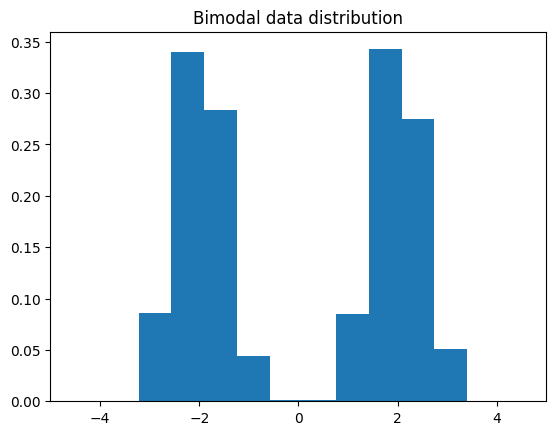

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# create a bimodal data distribution and visualize it
bimod_data = np.concatenate((np.random.normal(loc=-2,scale=.5,size=500), 
                             np.random.normal(loc=2, scale=.5,size=500)))

plt.hist(bimod_data, density=True)
plt.xlim([-5, 5])
plt.title("Bimodal data distribution")
plt.show()

Note, that there are three regions where the data has low probability to appear: 
* one on the right side of the distribution
* another one on the left
* and another around zero. 

Let's see if the IsolationForest is able to identify these three regions

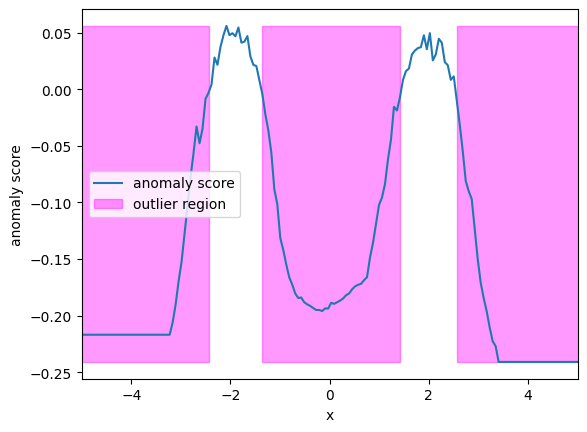

In [84]:
# create the IF with n=100 estimators (remember IF is a ensemble method)
isolation_forest2 = IsolationForest(n_estimators=100)
isolation_forest2.fit(bimod_data.reshape(-1, 1))

# create a test data set for rasterizing the x-axis the get the anomaly score for it.
anomaly_score_test_data = np.linspace(-6, 6, 200).reshape(-1,1)

# get the anomaly score (y) for each testing data point on x 
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)
# classify into an outlier or not (asc < 0 -> outlier)
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)

# visalize both: anomaly_score and outlier
plt.plot(anomaly_score_test_data, anomaly_score, label='anomaly score')
plt.fill_between(anomaly_score_test_data.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier_labels==-1, color='#FF00FF', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

**Key concept**: Test data walks pre-built tree paths—short path = anomaly (easy to isolate), long path = normal (hard to isolate).

---
---
## Task 4: Load Dataset 1 from Exercise 1

**Dataset 1: Heights and Weights Dataset**
- **Source**: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
- **Description**: Contains 25,000 records of human heights (inches) and weights (pounds) of 18-year-old individuals
- **Columns analyzed**: Height(Inches) and Weight(Pounds) for 2D anomaly detection
- **Expected distribution**: Normal distribution (heights and weights typically follow normal distributions)

In [85]:
# Load the Heights and Weights dataset from Kaggle
import pandas as pd
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("burnoutminer/heights-and-weights-dataset")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
csv_path = os.path.join(path, "SOCR-HeightWeight.csv")
df_ds1 = pd.read_csv(csv_path)

# Display basic information
print(f"\nDataset 1 Info:")
print(f"Total records: {len(df_ds1)}")
print(f"Columns: {list(df_ds1.columns)}")

# Extract Height and Weight columns for 2D anomaly detection
data_ds1 = df_ds1[['Height(Inches)', 'Weight(Pounds)']].values
print(f"\nData shape: {data_ds1.shape}")
print(f"Height range: {data_ds1[:, 0].min():.2f} - {data_ds1[:, 0].max():.2f} inches")
print(f"Weight range: {data_ds1[:, 1].min():.2f} - {data_ds1[:, 1].max():.2f} pounds")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/burnoutminer/heights-and-weights-dataset/versions/1

Dataset 1 Info:
Total records: 25000
Columns: ['Index', 'Height(Inches)', 'Weight(Pounds)']

Data shape: (25000, 2)
Height range: 60.28 - 75.15 inches
Weight range: 78.01 - 170.92 pounds


## Task 5: Apply Isolation Forest to Dataset 1

In [86]:
# Standardize the data before applying Isolation Forest
from sklearn.preprocessing import StandardScaler

scaler_ds1 = StandardScaler()
data_ds1_scaled = scaler_ds1.fit_transform(data_ds1)

# Apply Isolation Forest with recommended default parameters
# max_samples will automatically be set to min(256, n_samples)
isolation_forest_ds1 = IsolationForest(contamination='auto', random_state=1)

# Fit and predict on scaled data
outlier_labels_ds1 = isolation_forest_ds1.fit_predict(data_ds1_scaled)

# Calculate statistics
noise_count_ds1 = list(outlier_labels_ds1).count(-1)
anomaly_percentage_ds1 = (noise_count_ds1 / len(data_ds1)) * 100

print(f"Dataset 1 - Heights & Weights:")
print(f"Total data points: {len(data_ds1)}")
print(f"Total anomalies found: {noise_count_ds1}")
print(f"Anomaly percentage: {anomaly_percentage_ds1:.4f}%")

Dataset 1 - Heights & Weights:
Total data points: 25000
Total anomalies found: 5267
Anomaly percentage: 21.0680%


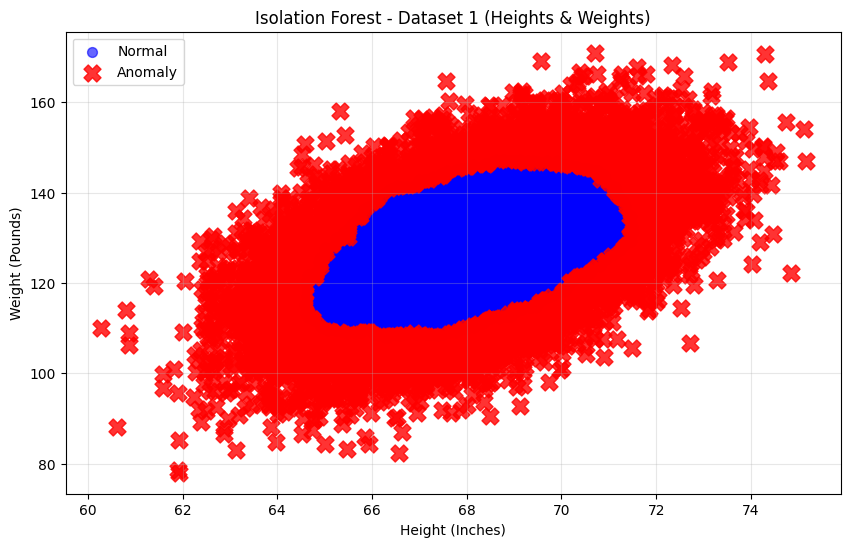

In [87]:
# Visualize the results for Dataset 1
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot normal points (blue)
plt.scatter(data_ds1[outlier_labels_ds1==1, 0], 
            data_ds1[outlier_labels_ds1==1, 1], 
            c='blue', 
            label='Normal', 
            alpha=0.6, 
            s=50)

# Plot anomaly points (red X)
plt.scatter(data_ds1[outlier_labels_ds1==-1, 0], 
            data_ds1[outlier_labels_ds1==-1, 1], 
            c='red', 
            label='Anomaly', 
            alpha=0.8, 
            s=150, 
            marker='X')

plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.title('Isolation Forest - Dataset 1 (Heights & Weights)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Observations for Dataset 1

- **Normal points** (blue): 19,733 points (78.93%)
- **Anomaly points** (red): 5,267 points (21.07%)

The anomaly points are mainly distributed at the edges of the main cluster, representing extreme height-weight combinations that deviate from typical 18-year-old physiology.

**Note**: The `contamination='auto'` parameter uses the original paper's method for setting the threshold. This parameter can be manually adjusted (e.g., `contamination=0.1` for 10% anomalies) based on domain knowledge or expected anomaly rate in the dataset.

---
---
## Task 4: Load Dataset 2 from Exercise 1

**Dataset 2: Apple iPhone Sales Data (2007-2025)**
- **Source**: https://www.kaggle.com/datasets/vengateshvengat/apple-iphone-complete-data-2007-2025
- **Description**: 81,260 iPhone sales records from India (2007-2025) with customer feedback
- **Columns analyzed**: customer_satisfaction_percent and rating for 2D anomaly detection
- **Expected distribution**: Normal distribution (customer satisfaction and ratings typically follow normal distributions)

In [88]:
# Load the Apple iPhone Sales dataset from Kaggle
path = kagglehub.dataset_download("vengateshvengat/apple-iphone-complete-data-2007-2025")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
csv_path = os.path.join(path, "iphone_india_full.csv")
df_ds2 = pd.read_csv(csv_path)

# Display basic information
print(f"\nDataset 2 Info:")
print(f"Total records: {len(df_ds2)}")
print(f"Columns: {list(df_ds2.columns)}")

# Extract customer_satisfaction_percent and rating columns for 2D anomaly detection
data_ds2 = df_ds2[['customer_satisfaction_percent', 'rating']].values
print(f"\nData shape: {data_ds2.shape}")
print(f"Customer Satisfaction range: {data_ds2[:, 0].min():.2f}% - {data_ds2[:, 0].max():.2f}%")
print(f"Rating range: {data_ds2[:, 1].min():.2f} - {data_ds2[:, 1].max():.2f}")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/vengateshvengat/apple-iphone-complete-data-2007-2025/versions/1

Dataset 2 Info:
Total records: 81260
Columns: ['sale_id', 'model_id', 'model_name', 'variant_name', 'sale_date', 'year', 'month', 'region', 'city', 'channel', 'units_sold', 'price_inr', 'revenue_inr', 'discount_percent', 'return_rate', 'profit_margin_percent', 'storage_gb', 'ram_gb', 'battery_mah', 'camera_mp', 'display_inches', 'chipset', 'os_version', 'weight_g', 'color', 'rating', 'reviews_count', 'customer_satisfaction_percent', 'avg_revenue_per_unit', 'cumulative_sales_model']

Data shape: (81260, 2)
Customer Satisfaction range: 55.13% - 99.41%
Rating range: 2.78 - 5.00


## Task 5: Apply Isolation Forest to Dataset 2

In [89]:
# Standardize the data before applying Isolation Forest
scaler_ds2 = StandardScaler()
data_ds2_scaled = scaler_ds2.fit_transform(data_ds2)

# Apply Isolation Forest with recommended default parameters
# max_samples will automatically be set to min(256, n_samples)
isolation_forest_ds2 = IsolationForest(contamination='auto', random_state=1)

# Fit and predict on scaled data
outlier_labels_ds2 = isolation_forest_ds2.fit_predict(data_ds2_scaled)

# Calculate statistics
noise_count_ds2 = list(outlier_labels_ds2).count(-1)
anomaly_percentage_ds2 = (noise_count_ds2 / len(data_ds2)) * 100

print(f"Dataset 2 - Customer Satisfaction & Rating:")
print(f"Total data points: {len(data_ds2)}")
print(f"Total anomalies found: {noise_count_ds2}")
print(f"Anomaly percentage: {anomaly_percentage_ds2:.4f}%")

Dataset 2 - Customer Satisfaction & Rating:
Total data points: 81260
Total anomalies found: 15732
Anomaly percentage: 19.3601%


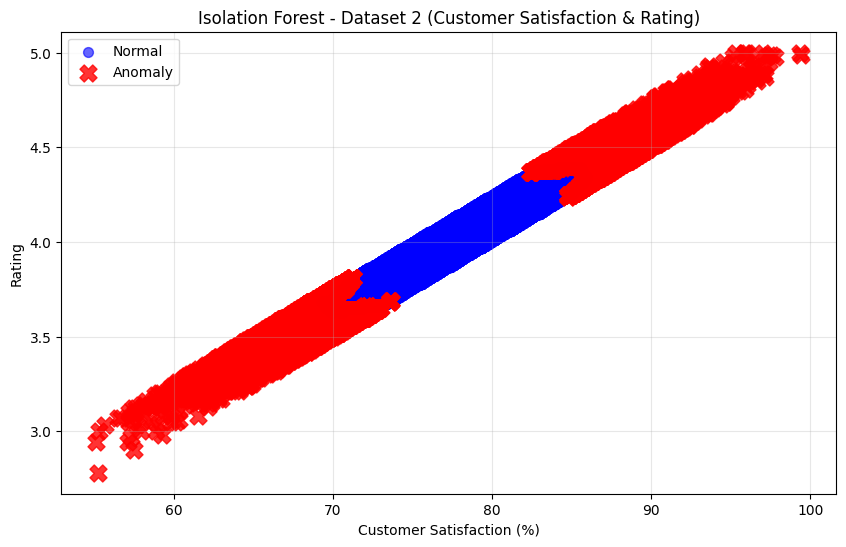

In [90]:
# Visualize the results for Dataset 2
plt.figure(figsize=(10, 6))

# Plot normal points (blue)
plt.scatter(data_ds2[outlier_labels_ds2==1, 0], 
            data_ds2[outlier_labels_ds2==1, 1], 
            c='blue', 
            label='Normal', 
            alpha=0.6, 
            s=50)

# Plot anomaly points (red X)
plt.scatter(data_ds2[outlier_labels_ds2==-1, 0], 
            data_ds2[outlier_labels_ds2==-1, 1], 
            c='red', 
            label='Anomaly', 
            alpha=0.8, 
            s=150, 
            marker='X')

plt.xlabel('Customer Satisfaction (%)')
plt.ylabel('Rating')
plt.title('Isolation Forest - Dataset 2 (Customer Satisfaction & Rating)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Observations for Dataset 2

- **Normal points** (blue): 65,528 points (80.64%)
- **Anomaly points** (red): 15,732 points (19.36%)

The anomaly points represent iPhone sales records with unusual combinations of customer satisfaction and ratings. These could indicate special cases such as promotional periods, early product launches, or specific regional market conditions.

---
---
## Task 4: Load Dataset 3 from Exercise 1

**Dataset 3: Spotify User Churn Analysis**
- **Source**: https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis
- **Description**: 8,000 Spotify user records with listening behavior and subscription data
- **Columns analyzed**: ads_listened_per_week and listening_time for 2D anomaly detection
- **Expected distribution**: Non-normal distribution (bimodal - two distinct user groups based on ad exposure levels)

In [91]:
# Load the Spotify Churn dataset from Kaggle
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
csv_path = os.path.join(path, "spotify_churn_dataset.csv")
df_ds3 = pd.read_csv(csv_path)

# Display basic information
print(f"\nDataset 3 Info:")
print(f"Total records: {len(df_ds3)}")
print(f"Columns: {list(df_ds3.columns)}")

# Extract ads_listened_per_week and listening_time columns for 2D anomaly detection
data_ds3 = df_ds3[['ads_listened_per_week', 'listening_time']].values
print(f"\nData shape: {data_ds3.shape}")
print(f"Ads per week range: {data_ds3[:, 0].min()} - {data_ds3[:, 0].max()} ads/week")
print(f"Listening time range: {data_ds3[:, 1].min()} - {data_ds3[:, 1].max()} minutes")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/nabihazahid/spotify-dataset-for-churn-analysis/versions/2

Dataset 3 Info:
Total records: 8000
Columns: ['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']

Data shape: (8000, 2)
Ads per week range: 0 - 49 ads/week
Listening time range: 10 - 299 minutes


## Task 5: Apply Isolation Forest to Dataset 3

In [92]:
# Standardize the data before applying Isolation Forest
scaler_ds3 = StandardScaler()
data_ds3_scaled = scaler_ds3.fit_transform(data_ds3)

# Apply Isolation Forest with recommended default parameters
# max_samples will automatically be set to min(256, n_samples)
isolation_forest_ds3 = IsolationForest(contamination='auto', random_state=1)

# Fit and predict on scaled data
outlier_labels_ds3 = isolation_forest_ds3.fit_predict(data_ds3_scaled)

# Calculate statistics
noise_count_ds3 = list(outlier_labels_ds3).count(-1)
anomaly_percentage_ds3 = (noise_count_ds3 / len(data_ds3)) * 100

print(f"Dataset 3 - Ads Per Week & Listening Time:")
print(f"Total data points: {len(data_ds3)}")
print(f"Total anomalies found: {noise_count_ds3}")
print(f"Anomaly percentage: {anomaly_percentage_ds3:.4f}%")

Dataset 3 - Ads Per Week & Listening Time:
Total data points: 8000
Total anomalies found: 2535
Anomaly percentage: 31.6875%


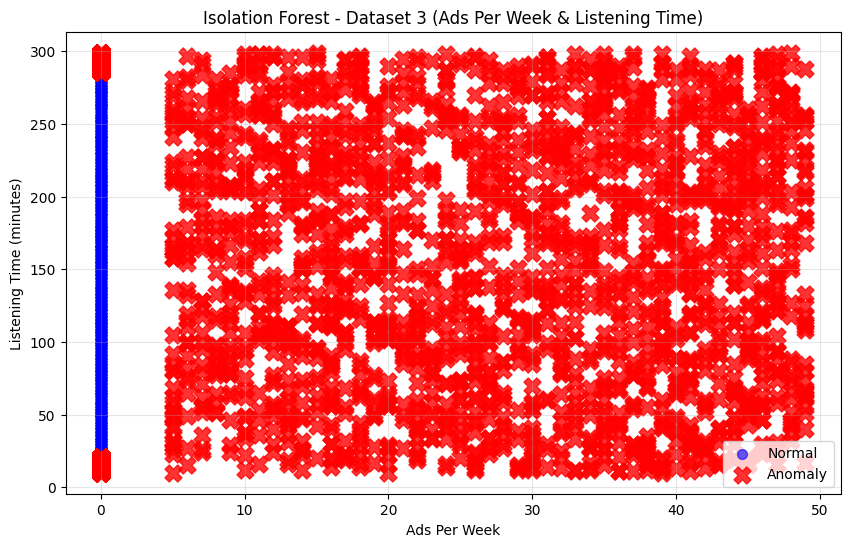

In [93]:
# Visualize the results for Dataset 3
plt.figure(figsize=(10, 6))

# Plot normal points (blue)
plt.scatter(data_ds3[outlier_labels_ds3==1, 0], 
            data_ds3[outlier_labels_ds3==1, 1], 
            c='blue', 
            label='Normal', 
            alpha=0.6, 
            s=50)

# Plot anomaly points (red X)
plt.scatter(data_ds3[outlier_labels_ds3==-1, 0], 
            data_ds3[outlier_labels_ds3==-1, 1], 
            c='red', 
            label='Anomaly', 
            alpha=0.8, 
            s=150, 
            marker='X')

plt.xlabel('Ads Per Week')
plt.ylabel('Listening Time (minutes)')
plt.title('Isolation Forest - Dataset 3 (Ads Per Week & Listening Time)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Observations for Dataset 3

- **Normal points** (blue): 5,465 points (68.31%)
- **Anomaly points** (red): 2,535 points (31.69%)

Dataset 3 shows a higher anomaly rate compared to the previous datasets. The anomalies represent Spotify users with unusual listening patterns, such as:
- Users in the zero-ads region (0 ads/week) with exceptionally low listening time
- Users in the high-ads region (many ads/week) with exceptionally high listening time
- Edge cases at the boundaries of both variables

The higher anomaly rate (31.69%) in this dataset is due to its bimodal distribution structure (two distinct user groups based on ad exposure), which naturally creates more isolated points.